## Texture mixing - first order method

In [1]:
from wasserstein.texture_mixing_new import compute_texture_mixing 
from utils.image_treatment import preprocess_image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image_path1 = 'data/smallRed.jpg'
image_path2 = 'data/PebbleGround.png'

In [3]:
image1 = preprocess_image(image_path1, new_size = (200,200))
image2 = preprocess_image(image_path2, new_size = (200,200))

In [4]:
textures = [image1, image2]
rho = [0.2, 0.4, 0.6, 0.8]
final_texture = []
for r in rho:
    final_texture.append(compute_texture_mixing(textures, [1-r, r], num_scales = 4, num_orientations = 4))

100%|██████████| 18/18 [01:00<00:00,  3.35s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 199.5, 199.5, -0.5)

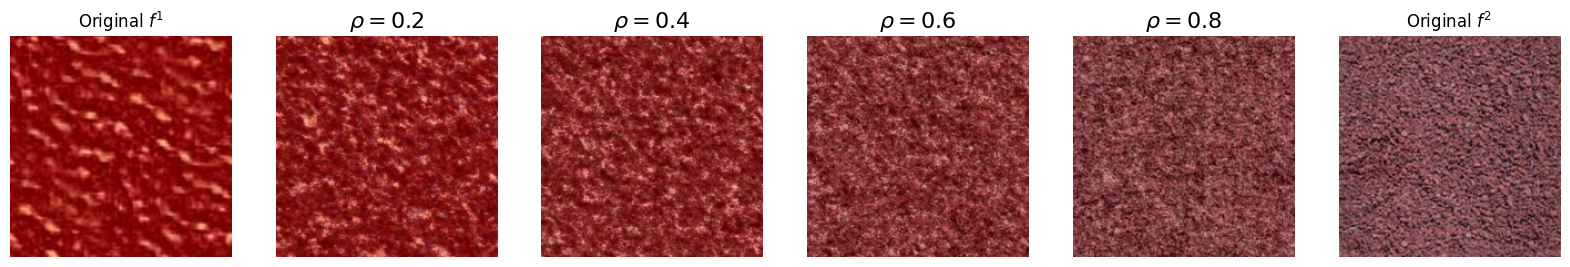

In [6]:
plt.figure(figsize=(20, 10))
plt.subplot(1,6,1)
plt.imshow(image1)
plt.axis('off') 
plt.title('Original $f^1$')
for i in range(len(final_texture)):
    plt.subplot(1,6,i+2)
    plt.imshow(final_texture[i])
    plt.title(f'$\\rho = {rho[i]}$', fontsize=16)
    plt.axis('off') 
plt.subplot(1,6,6)
plt.imshow(image2)
plt.title('Original $f^2$')
plt.axis('off') 

Rows: 0it [00:00, ?it/s]

100%|██████████| 18/18 [02:20<00:00,  7.81s/it]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████| 18/18 [01:51<00:00,  6.22s/it]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████| 18/18 [02:19<00:00,  7.75s/it]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████| 18/18 [01:55<00:00,  6.43s/it]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████| 18/18 [01:35<00:00,  5.30s/it]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████| 18/18 [01:44<00:00,  5.81s/it]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████| 18/18 [01:44<00:00,  5.83s/it]
Clip

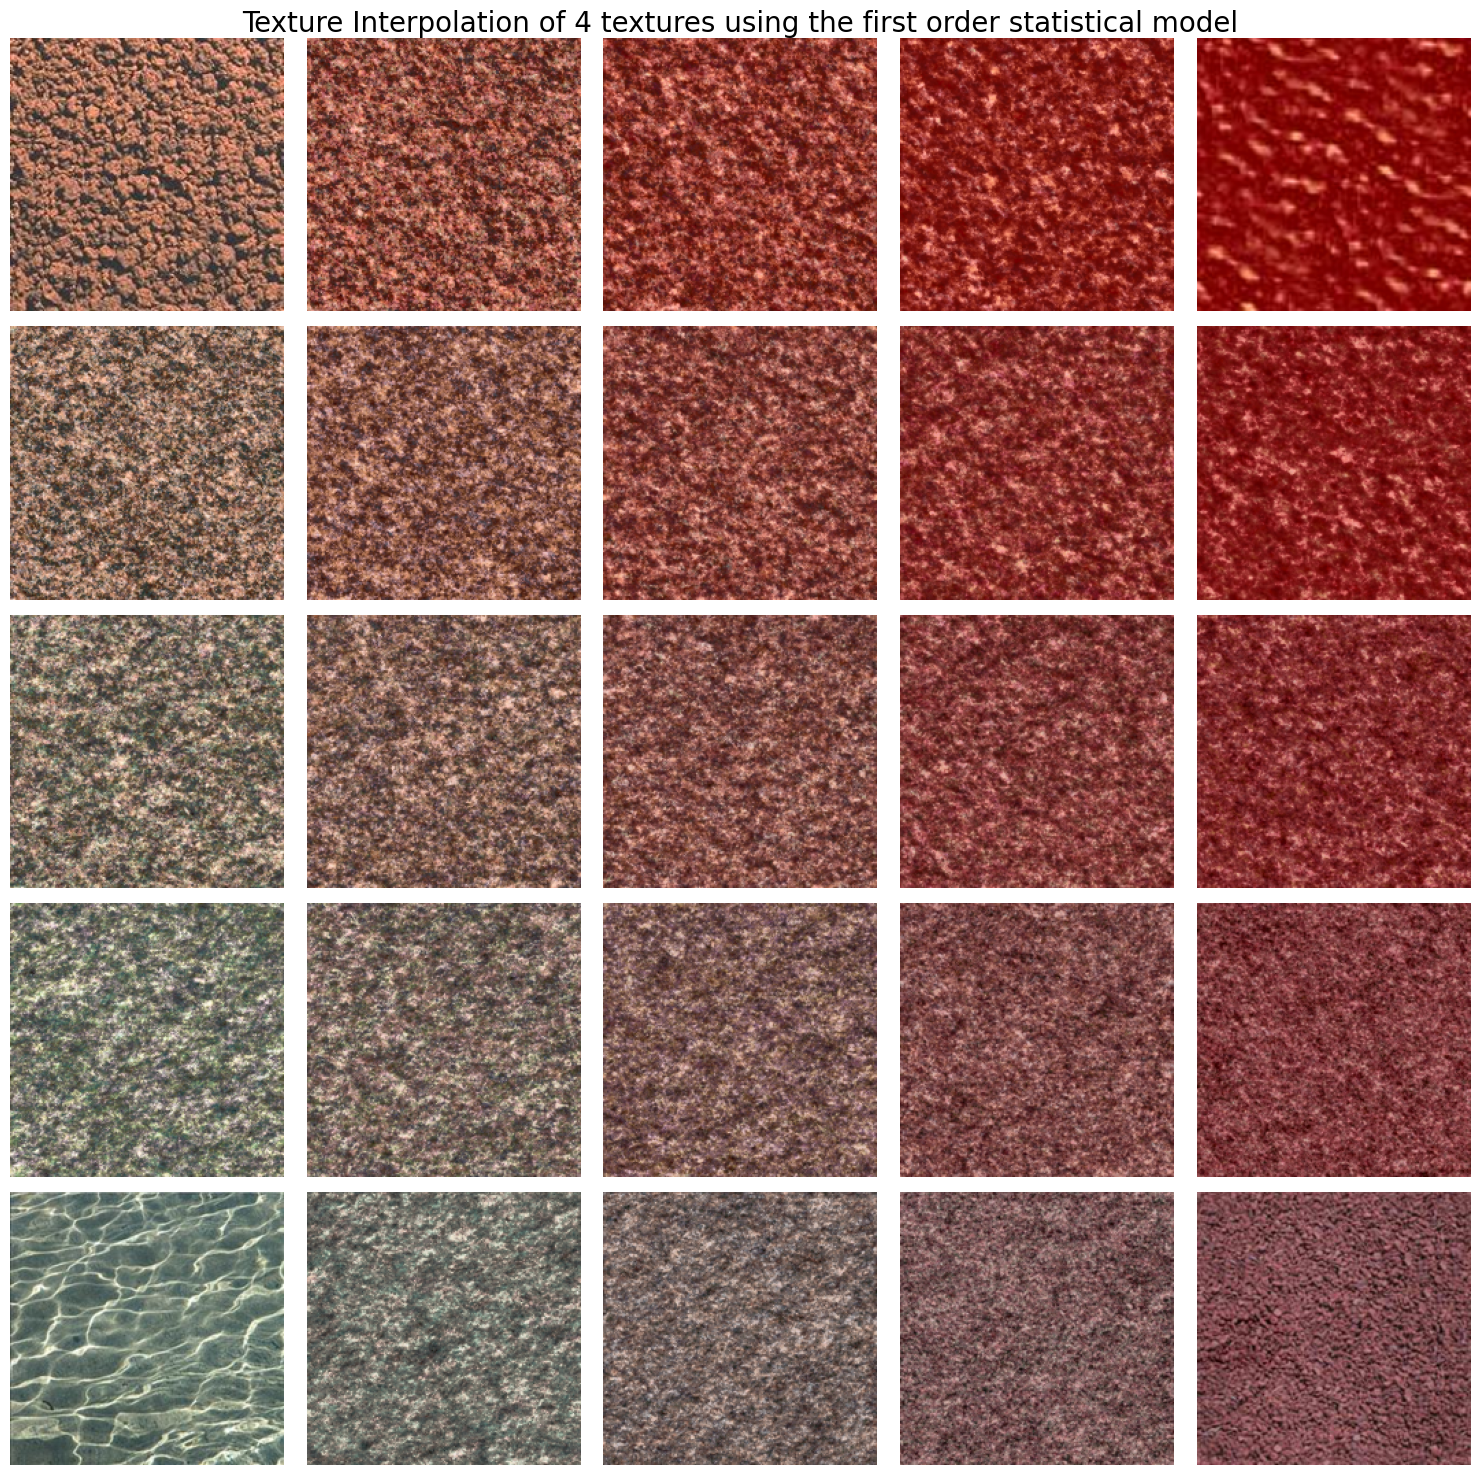

In [5]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

# Chargement des images et prétraitement
image_path1 = 'data/RedDirt.jpg'
image_path2 = 'data/Water.jpg'
image_path3 = 'data/smallRed.jpg'
image_path4 = 'data/PebbleGround.png'

size = 200
image1 = preprocess_image(image_path1, new_size=(size, size))
image2 = preprocess_image(image_path2, new_size=(size, size))
image3 = preprocess_image(image_path3, new_size=(size, size))
image4 = preprocess_image(image_path4, new_size=(size, size))

textures = [image1, image2, image3, image4]

# Définition des paramètres
alphas = np.linspace(0, 1, 5)  # Valeurs de alpha pour l'interpolation

# Initialiser la figure
plt.figure(figsize=(15, 15))

# Parcourir les indices pour construire la grille
for i, alpha_x in tqdm(enumerate(alphas), desc="Rows"):
    for j, alpha_y in enumerate(alphas):
        # Vérifier les coins pour afficher les images d'origine
        if (alpha_x, alpha_y) == (0, 0):
            data = image1
            title = "x1"
        elif (alpha_x, alpha_y) == (1, 0):
            data = image2
            title = "x2"
        elif (alpha_x, alpha_y) == (0, 1):
            data = image3
            title = "x3"
        elif (alpha_x, alpha_y) == (1, 1):
            data = image4
            title = "x4"
        else:
            # Calcul des poids pour le barycentre
            weights = [(1 - alpha_x) * (1 - alpha_y), alpha_x * (1 - alpha_y),
                       (1 - alpha_x) * alpha_y, alpha_x * alpha_y]
            data = compute_texture_mixing(textures, rho=weights, num_scales=4, num_orientations=4)
            #title = f"({alpha_x:.2f}, {alpha_y:.2f})"
        
        # Ajouter l'image au subplot
        ax = plt.subplot(5, 5, i * 5 + j + 1)
        ax.imshow(data)
        ax.axis('off')  # Masquer les axes
        #ax.set_title(title, fontsize=10)

# Ajouter un titre principal
plt.suptitle("Texture Interpolation of 4 textures using the first order statistical model", fontsize=20)
plt.tight_layout()
plt.savefig("outputs/interpolation_4_textures.png")
plt.show()